In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
dataset = pd.read_csv("datos_proyect.csv")

In [15]:
dataset.head(5)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [16]:
df = dataset[["Age","Review Text","Rating","Recommended IND","Positive Feedback Count","Division Name"]]

In [17]:
df.head(5)

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name
0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates
1,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General
2,60,I had such high hopes for this dress and reall...,3,0,0,General
3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite
4,47,This shirt is very flattering to all due to th...,5,1,6,General


### Valores nulos

In [7]:
import missingno as msno

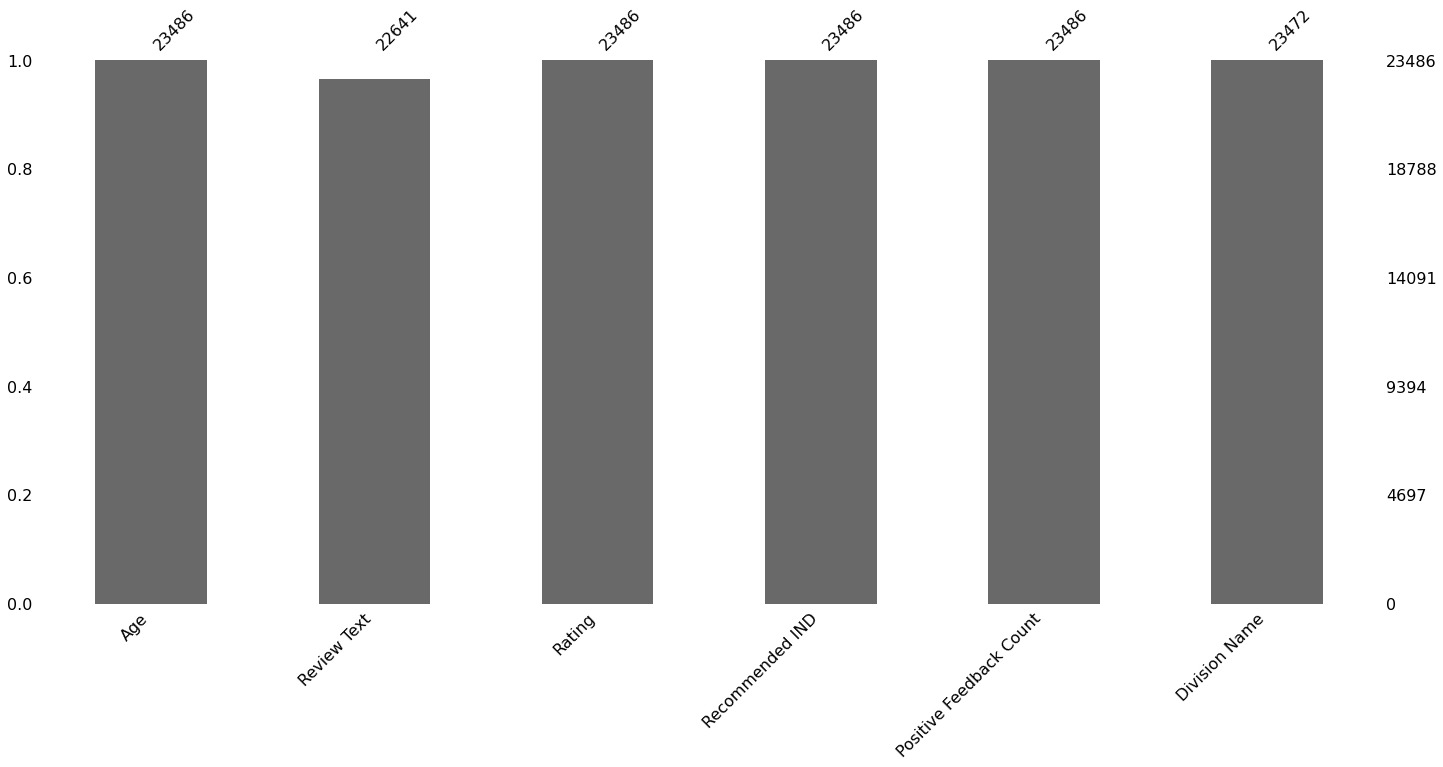

In [18]:
msno.bar(df)

In [22]:
df.isnull().any().any()

True

In [23]:
df = df.dropna()

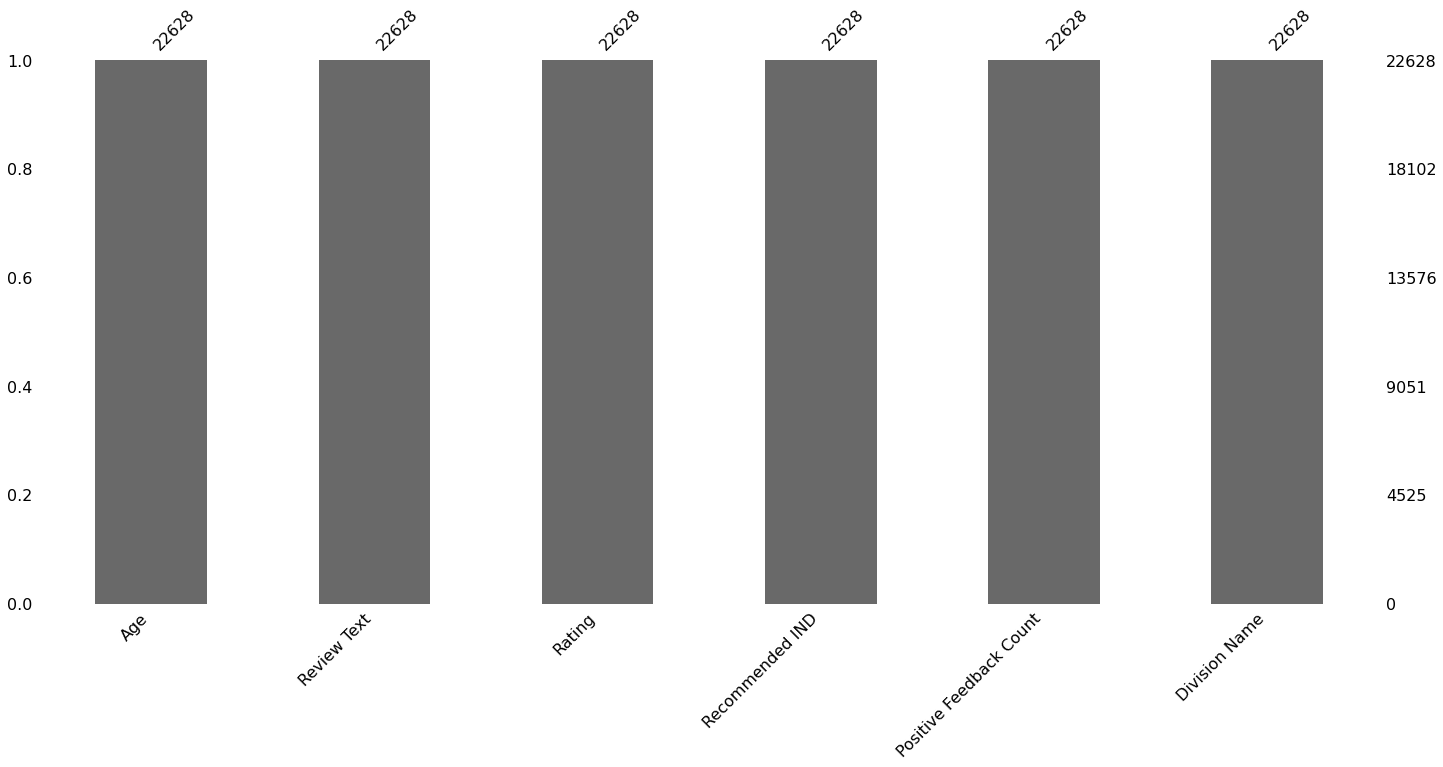

In [25]:
msno.bar(df)

In [26]:
df.isnull().any().any()

False

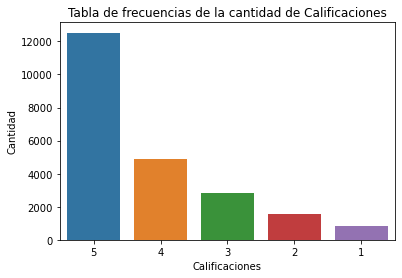

In [63]:
sns.countplot(x="Rating", data=df,order=df["Rating"].value_counts().index)
plt.title("Tabla de frecuencias de la cantidad de Calificaciones")
plt.ylabel("Cantidad")
plt.xlabel("Calificaciones");

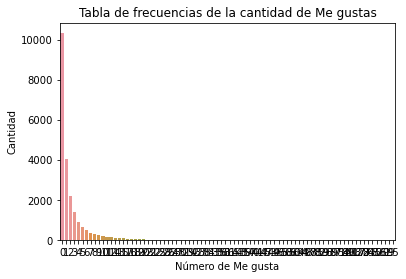

In [67]:
sns.countplot(x="Positive Feedback Count", data=df,order=df["Positive Feedback Count"].value_counts().index)
plt.title("Tabla de frecuencias de la cantidad de Me gustas")
plt.ylabel("Cantidad")
plt.xlabel("Número de Me gusta");

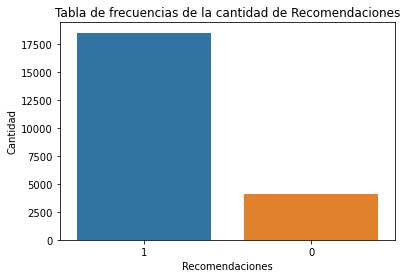

In [65]:
sns.countplot(x="Recommended IND", data=df,order=df["Recommended IND"].value_counts().index)
plt.title("Tabla de frecuencias de la cantidad de Recomendaciones")
plt.ylabel("Cantidad")
plt.xlabel("Recomendaciones");

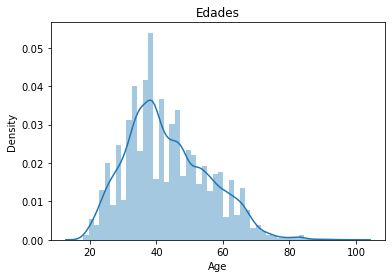

In [66]:
sns.distplot(df.Age)
plt.title("Edades")
plt.ylabel("Density");

## Primer modelo solo con las variables de texto

In [27]:
df_OT = df[["Review Text","Recommended IND"]]

In [31]:
len(df_OT["Review Text"])

22628

In [32]:
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

In [ ]:
#Tokenizacion de las palabras

In [33]:
cuerpo = df["Review Text"].tolist()

In [36]:
def processWords(cuerpo):
    for comment in cuerpo:
        index = cuerpo.index(comment)
        cuerpo[index] = cuerpo[index].casefold()
        cuerpo[index] = re.sub("[^ a-zA-Z]","",cuerpo[index]) #Remueve todos los elementos que NO sean letras 
        cuerpo[index] = re.sub("\S*\d\S*", "", cuerpo[index]) # Remueve numeros y palabras concatenadas con numeros como "H4cker"
        cuerpo[index] = re.sub("\S*@\S*\s?","",cuerpo[index]) # Remueve emails y menciones con "@"
        cuerpo[index] = re.sub(r'http\S+',"",cuerpo[index])   # Rumueve URL's (http)
        cuerpo[index] = re.sub(r'www\S+',"",cuerpo[index])    # Remueve URL's (www)
    return cuerpo

cuerpo_2 = processWords(cuerpo)
print(cuerpo_2[0])

absolutely wonderful  silky and sexy and comfortable


In [37]:
### Funcion que Aplica Stemmer en cada lista de tokens generados 
def applyStemming(Lista_de_tokens, stemmer):
    return [stemmer.stem(token) for token in Lista_de_tokens]
    
### Proceso de quitar stopwords y aplicar el stemmer
def processTokens(cuerpo, idioma):
    Stemmer = SnowballStemmer(idioma)
    for comment in cuerpo:
        index = cuerpo.index(comment)
        ListasDeTokens = word_tokenize(cuerpo[index])
        ListasDeTokens = [word for word in ListasDeTokens if word not in stopwords.words(idioma)]
        
        ListasDeTokens = applyStemming(ListasDeTokens, Stemmer) ### Aplica stemmer
        cuerpo[index] = " ".join(ListasDeTokens) ### Termina uniendo los elementos de cada listas
    return cuerpo

In [38]:
cuerpo_3 = processTokens(cuerpo_2,"english")

In [39]:
i = 3
print(cuerpo[i])
print(cuerpo_2[i])
print(cuerpo_3[i])

love love love jumpsuit fun flirti fabul everi time wear get noth great compliment
love love love jumpsuit fun flirti fabul everi time wear get noth great compliment
love love love jumpsuit fun flirti fabul everi time wear get noth great compliment


In [40]:
from sklearn.feature_extraction.text import CountVectorizer

In [51]:
cv = CountVectorizer()
X = cv.fit_transform(cuerpo_3).toarray()

In [52]:
pd.DataFrame(X).head(10)

,0,1,2,3,4,5,6,7,8,9,...,15277,15278,15279,15280,15281,15282,15283,15284,15285,15286
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
Y = df_OT.iloc[:,1].values

In [54]:
len(X)

22628

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state = 0, test_size = .20)

In [58]:
from sklearn.svm import SVC
classifier = SVC(kernel = "linear", random_state = 0)
classifier.fit(X_train,y_train)

SVC(kernel='linear', random_state=0)

In [59]:
y_pred = classifier.predict(X_test)

In [60]:
from sklearn.metrics import confusion_matrix as cm
Cm = cm(y_test,y_pred)
pd.DataFrame(Cm)

,0,1
0,498,359
1,229,3440


In [61]:
from tabulate import tabulate

def Scores(mc):
    TP = mc[1][1]
    TN = mc[0][0]
    FP = mc[0][1]
    FN = mc[1][0]
    
    Accuracy = (TP+TN)/(TP+TN+FP+FN)
    Precision = TP/(TP+FP)
    Recall = TP/(TP+FN)
    F1_Score = 2*Precision*Recall/(Precision+Recall)
    
    Tabla = [["Accuracy", Accuracy], 
             ["Precision", Precision], 
             ["Recall", Recall], 
             ["F1_Score", F1_Score]]
    
    print(tabulate(Tabla))

In [62]:
Scores(Cm)

---------  --------
Accuracy   0.870084
Precision  0.905501
Recall     0.937585
F1_Score   0.921264
---------  --------
